In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad # numerical integration
%matplotlib notebook

In [12]:
def fourier_coeffs(f, n):
    a=np.zeros(n+1)
    b=np.zeros(n+1)
    
    L=2*np.pi
    
    I,_=quad(f,0, L)
    a[0]=(1/L)*I
    
    for k in range(1,n+1):
        Ic,_=quad(lambda t : f(t)*np.cos(k*t), 0, L)
        a[k]=1/np.pi*Ic
        Is,_=quad(lambda t : f(t)*np.sin(k*t), 0, L)
        b[k]=1/np.pi*Is
        
    return a,b
    

In [13]:
def fourier_fcn(a,b,t):
    n=np.size(a)-1
    y = a[0]*np.ones_like(t)
    for k in range(1,n+1):
        y+= a[k]*np.cos(k*t)+b[k]*np.sin(k*t)
        
    return y

In [26]:
f = lambda t : t
degree = 2
a,b=fourier_coeffs(f,degree)
print(a)
print(b)

[ 3.14159265e+00  4.44089210e-16 -4.44089210e-16]
[ 0. -2. -1.]


<IPython.core.display.Javascript object>


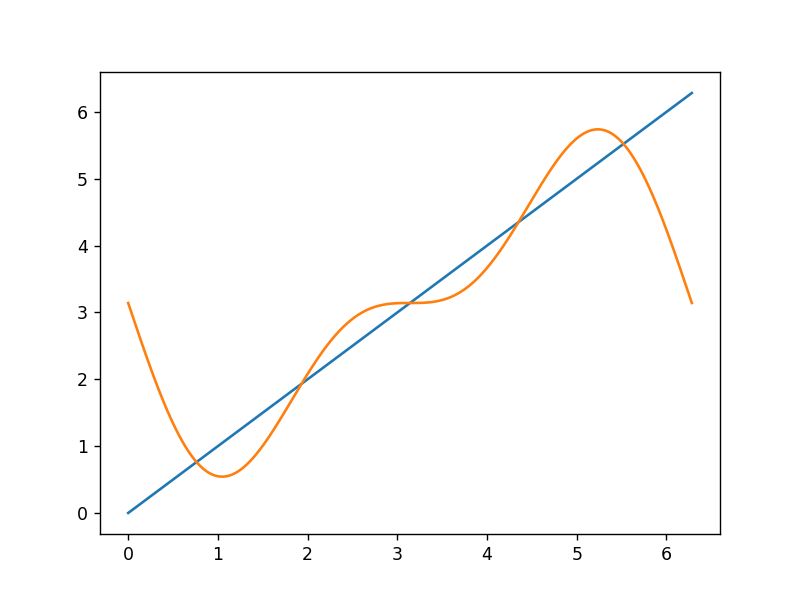

In [28]:
t=np.linspace(0, 2*np.pi,1000)
plt.plot(t, f(t))
plt.plot(t, fourier_fcn(a,b,t))